# Lan truyền xuôi, lan truyền ngược và đồ thị tính toán




### Giới thiệu

Trong học sâu (deep learning), một bài toán quan trọng là **huấn luyện mạng neural** sao cho nó có thể học được các mẫu (patterns) từ dữ liệu và tổng quát hóa tốt khi gặp dữ liệu mới. Quá trình huấn luyện này yêu cầu **điều chỉnh trọng số và bias** của mạng để **giảm sai số (loss)** giữa đầu ra mô hình và nhãn thật sự.

Một vấn đề cốt lõi là: **Làm sao để tính được độ dốc (gradient) của hàm mất mát theo từng tham số trong một mạng có nhiều lớp?**  
=> **Backpropagation** ra đời để giải quyết chính xác bài toán này.

---


### Các vấn đề đang sử dụng backpropagation

Trong khoa học máy tính, đặc biệt trong lĩnh vực trí tuệ nhân tạo và machine learning, backpropagation giúp giải quyết nhiều bài toán bằng cách:

- Cho phép **huấn luyện mạng nhiều lớp (deep neural networks)** hiệu quả.
- Cung cấp **đạo hàm chính xác và nhanh** thông qua Chain Rule.
- Làm nền tảng cho các **framework học sâu** như PyTorch, TensorFlow.

Nhờ backpropagation, các mô hình có thể **liên tục cải thiện hiệu năng** qua các vòng huấn luyện, và học từ dữ liệu thực tế theo cách có thể mở rộng (scalable).

Trước khi đi vào lan truyền ngược, chúng ta sẽ tìm hiểu chiều thuận tính toán dự đoán của MLP thông qua mạng với một mạng ẩn dưới đây:

### 5.3.1 Lan truyền xuôi
Lan truyền thuận (forward propagation/forward pass) đề cập đến viẹc tính toán và lưu trữ các biến trung (giữa các lớp và cả đầu ra) cho một mạng MLP theo thứ tự từ đầu vào dến lớp đầu ra.
 
Để đơn giản hoá thì đầu vào của chúng ta sẽ là 1 vector $ \mathbf{x} \in \mathbb{R}^d $ với $d$ là số đặc điểm (feature) của input. Và lớp ẩn của chúng ta sẽ tạm thời bỏ qua bias (MLP với bias sẽ được biểu diễn ở phần bài tập). Ở đây biến trung gian là :

$$\mathbf{z} = \mathbf{W^{(1)} \mathbf{x}}$$

Với $\mathbf{W^{(1)}} \in \mathbb{R}^{h \times d} $ là trọng số của lớp ẩn. Sau khi duyệt qua lớp này, biến trung gian $\mathbf{z} \in \mathbb{R}^h$ sẽ được truyền qua hàm kích hoạt $\phi$, sau bước này chúng ta sẽ có được vector kích hoạt ẩn có chiều dài h,

$$\mathbf{h} = \phi (\mathbf{z})$$

Biến ẩn $\mathbf{h}$ cũng là một biến trung gian. Giả sử rằng các tham số của lớp đầu ra chỉ sở hữu trọng lượng $\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$, ta có thể thu được một biến lớp đầu ra với một vectơ có chiều dài $q$: 

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

Giả sử hàm mất là $l$ và nhãn ví dụ là $y$, sau đó chúng ta có thể tính toán thuật ngữ mất mát cho một ví dụ dữ liệu duy nhất, 

$$L = l(\mathbf{o}, y).$$

Theo định nghĩa của $L_2$ chính quy hóa, với siêu tham số $\lambda$, thuật ngữ chính quy hóa là 

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right),$$

trong đó định mức Frobenius của ma trận chỉ đơn giản là định mức $L_2$ được áp dụng sau khi làm phẳng ma trận thành một vectơ. Cuối cùng, tổn thất thường xuyên của mô hình trên một ví dụ dữ liệu nhất định là: 

$$J = L + s.$$

Chúng tôi đề cập đến $J$ là chức năng mục tiêu *trong cuộc thảo luận sau đây. 

## Đồ thị tính toán của lan truyền xuôi

Vẽ đồ thị tính toán * giúp chúng ta hình dung các phụ thuộc của toán tử và biến trong phép tính. Hình bên dưới thể hiện đồ thị mạng đơn giản được mô tả ở trên, trong đó các ô vuông biểu thị các biến và vòng tròn biểu thị các toán tử. Góc dưới bên trái biểu thị đầu vào và góc trên bên phải là đầu ra. Lưu ý rằng các hướng của các mũi tên (minh họa luồng dữ liệu) chủ yếu là bên phải và hướng lên. 

Dưới đây là đồ thị tính toán của mạng nơ-ron đã được đề cập ở trên


![Đồ thị tính toán](https://d2l.aivivn.com/_images/forward.svg)


## Lan truyền ngược

*Backpropagation* đề cập đến phương pháp tính toán
độ dốc của các tham số mạng thần kinh. Nói tóm lại, phương pháp đi qua mạng theo thứ tự ngược lại, từ đầu ra đến lớp đầu vào, theo quy tắc chuỗi *từ tính toán. Thuật toán lưu trữ bất kỳ biến trung gian nào (dẫn xuất từng phần) cần thiết trong khi tính toán gradient đối với một số tham số. Giả sử rằng chúng ta có chức năng $\mathsf{Y}=f(\mathsf{X})$ và $\mathsf{Z}=g(\mathsf{Y})$, trong đó đầu vào và đầu ra $\mathsf{X}, \mathsf{Y}, \mathsf{Z}$ là hàng chục hình dạng tùy ý. Bằng cách sử dụng quy tắc chuỗi, chúng ta có thể tính toán đạo hàm của $\mathsf{Z}$ đối với $\mathsf{X}$ qua 

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

Ở đây chúng tôi sử dụng toán tử $\text{prod}$ để nhân các đối số của nó sau các hoạt động cần thiết, chẳng hạn như chuyển vị và trao đổi vị trí đầu vào, đã được thực hiện. Đối với vectơ, điều này rất đơn giản: nó chỉ đơn giản là phép nhân ma trận ma trận. Đối với hàng chục chiều cao hơn, chúng tôi sử dụng đối tác thích hợp. Các nhà điều hành $\text{prod}$ ẩn tất cả các ký hiệu trên cao. 

Nhớ lại rằng các tham số của mạng đơn giản với một lớp ẩn, là $\mathbf{W}^{(1)}$ và $\mathbf{W}^{(2)}$. Mục tiêu của sự lan truyền ngược là tính toán độ dốc $\partial J/\partial \mathbf{W}^{(1)}$ và $\partial J/\partial \mathbf{W}^{(2)}$. Để thực hiện điều này, chúng ta áp dụng quy tắc chuỗi và tính toán, lần lượt, gradient của mỗi biến và tham số trung gian. Thứ tự các tính toán được đảo ngược so với các tính toán được thực hiện trong quá trình truyền chuyển tiếp, vì chúng ta cần bắt đầu với kết quả của biểu đồ tính toán và làm việc theo cách của chúng tôi hướng tới các tham số. Bước đầu tiên là tính toán độ dốc của hàm khách quan $J=L+s$ liên quan đến thuật ngữ mất $L$ và thuật ngữ chính quy hóa $s$. 

$$\frac{\partial J}{\partial L} = 1 \; \text{and} \; \frac{\partial J}{\partial s} = 1.$$

Tiếp theo, chúng ta tính toán gradient của hàm mục tiêu đối với biến của lớp đầu ra $\mathbf{o}$ theo quy tắc chuỗi: 

$$
\frac{\partial J}{\partial \mathbf{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

Tiếp theo, chúng ta tính toán độ dốc của thuật ngữ chính quy hóa đối với cả hai tham số: 

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

Bây giờ chúng ta có thể tính toán gradient $\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$ của các tham số mô hình gần nhất với lớp đầu ra. Sử dụng sản lượng quy tắc chuỗi: 

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$

Để có được gradient đối với $\mathbf{W}^{(1)}$, chúng ta cần tiếp tục lan truyền ngược dọc theo lớp đầu ra đến lớp ẩn. Gradient liên quan đến đầu ra của lớp ẩn $\partial J/\partial \mathbf{h} \in \mathbb{R}^h$ được đưa ra bởi 

$$
\frac{\partial J}{\partial \mathbf{h}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$

Vì hàm kích hoạt $\phi$ áp dụng elementwise, tính gradient $\partial J/\partial \mathbf{z} \in \mathbb{R}^h$ của biến trung gian $\mathbf{z}$ yêu cầu chúng ta sử dụng toán tử nhân elementwise, mà chúng ta biểu thị bằng $\odot$: 

$$
\frac{\partial J}{\partial \mathbf{z}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

Cuối cùng, chúng ta có thể lấy gradient $\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$ của các tham số mô hình gần nhất với lớp đầu vào. Theo quy tắc chuỗi, chúng tôi nhận được 

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$





## Bài tập


### 1. Assume that the inputs $\mathbf{X}$ to some scalar function $f$ are $n \times m$ matrices. What is the dimensionality of the gradient of $f$ with respect to $\mathbf{X}$?


Miền gradient của hàm $f$ sẽ có miền giống với miền của ma trận X, tức là $\mathbb{R}^{n \times m}$:

$
\frac{\partial f}{\partial \mathbf{X}} \in \mathbb{R}^{n \times m}.
$

Với mỗi phần tử của ma trận, gradient sẽ là:
$
\left[ \frac{\partial f}{\partial X} \right]_{ij} = \frac{\partial f}{\partial X_{ij}}
$

$
\frac{\partial f}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial f}{\partial x_{11}} & \frac{\partial f}{\partial x_{21}} & \cdots & \frac{\partial f}{\partial x_{n1}} \\
\frac{\partial f}{\partial x_{12}} & \frac{\partial f}{\partial x_{22}} & \cdots & \frac{\partial f}{\partial x_{n2}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f}{\partial x_{1m}} & \frac{\partial f}{\partial x_{2m}} & \cdots & \frac{\partial f}{\partial x_{nm}}
\end{bmatrix}
$




### 2. Add a bias to the hidden layer of the model described in this section (you do not need to include bias in the regularization term).
1. Draw the corresponding computational graph.
2. Derive the forward and backward propagation equations.




Dựa theo đồ thị tính toán ở phần lý thuyết, ta thêm bias vào hidden layer, ta có thể biểu diễn lại công thức tính toán của hidden layer như sau:

#### Lan truyền xuôi

Input to hidden layer:$\mathbf{z} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b_{1}}$

Hidden layer to activation:$\mathbf{h} = \phi(\mathbf{z})$

Output layer:$\mathbf{o} = \mathbf{W}^{(2)} \mathbf{h} + \mathbf{b_{2}}$

Hàm mất mát:$L  = l(o,y)$

Lượng điều chuẩn: $s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right)$

Hàm mục tiêu:$\mathcal{J} = L + s $


![Đồ thị tính toán](./images/computational%20graph.png)



#### Lan truyền ngược

$$\frac{\partial J}{\partial \mathbf{L}} = 1 $$
$$\frac{\partial J}{\partial \mathbf{s}} = 1 $$
$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{và} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

**1. Gradient theo output lớp cuối:**
$
\frac{\partial J}{\partial \mathbf{o}} = \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}} \in \mathbb{R}^{q} $

**2. Gradient theo trọng số lớp 2:**
$
\frac{\partial J}{\partial \mathbf{W}^{(2)}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.
$

**3. Gradient theo bias lớp 2:**
$
\frac{\partial J}{\partial \mathbf{b}_{2}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{b}_{2}}\right) = \frac{\partial \mathcal{L}}{\partial \mathbf{o}}
$

**4. Gradient theo output lớp ẩn:**
$
\frac{\partial J}{\partial \mathbf{h}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right) = \mathbf{W}^{(2)\top} \cdot \frac{\partial J}{\partial \mathbf{o}}
$

**5. Gradient trước kích hoạt lớp ẩn (sau linear):**
$
\frac{\partial J}{\partial \mathbf{z}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right) = \frac{\partial J}{\partial \mathbf{h}} \odot \phi'(\mathbf{z})
$

**6. Gradient theo trọng số lớp 1:**
$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}
$

**7. Gradient theo bias lớp 1:**
$
\frac{\partial J}{\partial \mathbf{b}_{1}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{b}_{1}}\right) = \frac{\partial J}{\partial \mathbf{z}}
$

### 3. Compute the memory footprint for training and prediction in the model described in this section.




#### Kiến trúc Mạng Neural

- Input: $\ \mathbf{x} \in \mathbb{R}^d $
- Hidden layer:
  $
  \mathbf{z} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}_{1} \quad \text{(pre-activation)}
  $
  $
  \mathbf{h} = \phi(\mathbf{z}) \quad \text{(activation)}
  $
- Output layer (tuyến tính):
  $
  \mathbf{o} = \mathbf{W}^{(2)} \mathbf{h} + \mathbf{b}_{2}
  $
- Hàm mất mát: $ L(\mathbf{o}, \mathbf{y}) $
- Hàm mục tiêu có regularization:
  $
  J = L + \frac{\lambda}{2} \left( \| \mathbf{W}^{(1)} \|_F^2 + \| \mathbf{W}^{(2)} \|_F^2 \right)
  $

---

#### Các thành phần cần lưu trong bộ nhớ

##### Tham số:

- $ \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d} :  hd $
- $ \mathbf{b}_{1} \in \mathbb{R}^h :  h $
- $  \mathbf{W}^{2} \in \mathbb{R}^{q \times h} :  qh $ 
- $  \mathbf{b}_{2} \in \mathbb{R}^q : q $ 

Tổng tham số:  
$
hd + h + qh + q
$

---

#### Memory khi Dự đoán (Inference)

##### Cần lưu:

- Tham số: $  hd + h + qh + q $ 
- Kích hoạt:
  - Input $\mathbf{x} \in \mathbb{R}^{d}$ : $  d $ 
  - Hidden linear $\mathbf{z} \in \mathbb{R}^{h}$: $  h $ 
  - Hidden activation $\mathbf{h} \in \mathbb{R}^{h}$ : $  h $ 
  - Output $\mathbf{o} \in \mathbb{R}^{q}$: $  q $ 

##### Tổng bộ nhớ:
$ 
hd + qh + 3h + 2q + d
$ 

---

#### Memory khi Huấn luyện (Training)

##### Ngoài inference, thêm:

- Gradient tham số ($\frac{\partial J}{\partial \mathbf{W}^{(2)}{}}; \frac{\partial J}{\partial \mathbf{b}_{2}{}} ; \frac{\partial J}{\partial \mathbf{W}^{(1)}{}}  ; \frac{\partial J}{\partial \mathbf{b}_{1}{}}$) : $  hd + h + qh + q $ 
- Gradient trung gian:
  - $  \frac{\partial J}{\partial \mathbf{o}} :  q $ 
  - $  \frac{\partial J}{\partial \mathbf{h}} :  h $ 
  - $  \frac{\partial J}{\partial \mathbf{z}} :  h $ 

#### Tổng bộ nhớ:
$ 
2(hd + h + qh + q) + d + 3h + q
$ 

---


#### Ví dụ (với $  d=100, h=50, q=10 $ ) và giá trị lưu là float với kích thước 4 bytes

- **Inference:**
  $ 
  100 \cdot 50 + 10 \cdot 50 + 3 \cdot 50 + 2 \cdot 10 + 100 = 5770
  $ 
  → $ 5770 \times 4 = \mathbf{23.08 \text{ KB}} $

- **Training:**
  $ 
  2 \cdot (5000 + 50 + 500 + 10) + 100 + 150 + 10 = 11380
  $ 
  → $ 11380 \times 4 = \mathbf{45.52} \text{ KB} $


### 4. Assume that you want to compute second derivatives. What happens to the computational graph? How long do you expect the calculation to take?


Ở đạo hàm bậc một, đạo hàm tại mỗi nút sẽ là có kích thước theo tham số (w.r.t) như đã đề cập ở bài tập số 1


Miền gradient của hàm $f$ sẽ có miền giống với miền của ma trận X, tức là $\mathbb{R}^{n \times m}$:

$
\frac{\partial f}{\partial \mathbf{X}} \in \mathbb{R}^{n \times m}.
$

Với mỗi phần tử của ma trận, gradient sẽ là:
$
\left[ \frac{\partial f}{\partial X} \right]_{ij} = \frac{\partial f}{\partial X_{ij}}
$

Khi chuyển qua đạo hàm bậc 2 với mạng nơ ron đã đề cập ở bài 2 các biểu thức mục tiêu sẽ là $\frac{\partial^2 J}{\partial \mathbf{W}^{(2)}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{W}^{(1)}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{b}_{2}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{b}_{1}{}^2}$


Biểu thức Hessian của hàm mất mát $J$ theo  $\mathbf{W}^{(2)} \in \mathbb{R}^{n \times m}$

$$
\frac{\partial^2 J}{\partial \mathbf{W}^{(2)}{}^2} = 
\begin{bmatrix}
\frac{\partial^2 J}{\partial {W^{(2)}_{11}}^2} & \frac{\partial^2 J}{\partial W^{(2)}_{11} \partial W^{(2)}_{12}} \\
\frac{\partial^2 J}{\partial W^{(2)}_{12} \partial W^{(2)}_{11}} & \frac{\partial^2 J}{\partial {W^{(2)}_{12}}^2}
\end{bmatrix} \in \mathbb{R}^{nm \times nm}
$$

Trong đó các phần tử $W^{(2)}_{ij}$ là 1 phẩn tử tại vị trí $ij$ trong ma trận $W^{(2)}$

So với gradient không gian tính toán từ $ {n \times m} $ sang hessian ${nm \times nm}$ dẫn tới 2 điều:
- Số lượng phép tính cần tính toán tăng vọt theo cấp số mũ, dẫn tới thời gian thực thi lâu hơn đáng kể
- Không gian dữ liệu cần để lưu trữ của một node chuyển từ ${n \times m}$  sang ${nm \times nm}$, dẫn tới yêu cầu bộ nhớ nhiều hơn có thể đạt tới giới hạn của phần cứng trong quá trình chạy.

Dưới đây là code minh hoạ việc tính gradient của gradien (hessian) có sử dụng đến autograd để hỗ trợ tính toán:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

# 1. Định nghĩa mô hình nhỏ
class SmallMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 10)  # W1
        self.fc2 = nn.Linear(10, 5)  # W2

    def forward(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h)

# 2. Tạo input và label
x = torch.tensor([[1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0]], requires_grad=False)
y_true = torch.tensor([[1.0, 2.0, 2.0, 3.0, 4.0]])

# 3. Khởi tạo model
model = SmallMLP()

# 4. Đảm bảo model.parameters() có requires_grad = True (mặc định rồi)
W1 = model.fc1.weight  # Tham chiếu đến trọng số W1
# W2 = model.fc2.weight 
# 5. Tính thời gian gradient bậc 1

y_pred = model(x)
loss = F.mse_loss(y_pred, y_true)
start_grad = time.time()
grad = torch.autograd.grad(loss, W1, create_graph=True)[0]
end_grad = time.time()

# 6. Tính thời gian Hessian (đạo hàm bậc 2)
start_hess = time.time()
grad_flat = grad.view(-1)
hessian_rows = []
for g in grad_flat:
    row = torch.autograd.grad(g, W1, retain_graph=True)[0].view(-1)
    hessian_rows.append(row)
hessian = torch.stack(hessian_rows)
end_hess = time.time()

# 7. In kết quả
print(f"⏱️ Gradient time: {end_grad - start_grad:.6f} seconds")
print(f"⏱️ Hessian time:  {end_hess - start_hess:.6f} seconds")


⏱️ Gradient time: 0.000998 seconds
⏱️ Hessian time:  0.026999 seconds


: 

Ta có thể thấy thời gian tính Hessian lớn hơn hẳn so với Gradient


### 5. Assume that the computational graph is too large for your GPU.
1. Can you partition it over more than one GPU?
2. What are the advantages and disadvantages over training on a smaller minibatch?



#### Với trường hợp mô hình tính toán quá lớn so với kích thước bộ nhớ của GPU ta có một vài cách để chia nhỏ mô hình ra như sau:

##### Model Parallelism
Chia các phần của model thành các phần khác nhau sau đó gán cho từng GPUs. Ví dụ như:

```yml
GPU 0:  Input → Layer 1 → Layer 2  
GPU 1:               → Layer 3 → Output
```
Trong đó mỗi GPU sẽ tính toán một phần forward/backward, và dữ liệu sẽ được truyền giữa các GPU trong suốt quá trình


##### Data  Parallelism
Chúng ta sẽ tách BatchData thành các minibatch và training trên từng GPU, với model giống hệt nhau trên các GPU. Vì  minibatch nhỏ hơn nên số lượng gradient và các nút trung gian trên mỗi GPU giảm đi đáng kể. Tuy nhiên, ta tổng hợp lại gradient để cập nhật Weight và bias trên các layer.

![Hình minh hoạ](./images/data_parralelim.png)


#### Điểm mạnh và điểm yếu của việc training thông qua cái minibatch nhỏ hơn


Điểm mạnh như đã nói ở phần data paralelism, tập số lượng sample trong batch nhỏ hơn sẽ giúp giảm bộ nhớ yêu cầu để lưu các gradient và các nút trung gian, cho phép model chạy trên một GPU. Với trường hợp chạy toàn bộ model trên 1 GPU thì sẽ giúp giảm thiểu chi phí giao tiếp, đồng bộ dữ liệu như trong Data Parallelism.

Ngoài ra batch nhỏ hơn cũng giúp quá trình training nhanh hơn giúp model được thường xuyên cập nhật hơn.


Điểu yếu:
- Hội tụ chậm hơn: Các minibatch nhỏ có thể dẫn đến ước lượng gradient nhiễu hơn, làm chậm quá trình hội tụ.
- Khả năng bị overfitting: Huấn luyện với minibatch nhỏ có thể dẫn đến overfitting, vì mô hình không được thấy đa dạng ví dụ trong mỗi lần cập nhật.


Sử dụng thiết bị: cuda
Thời gian chạy code: 2025-05-09 19:31:31
Kích thước tập huấn luyện: torch.Size([8000, 20]), torch.Size([8000, 1])
Kích thước tập kiểm tra: torch.Size([2000, 20]), torch.Size([2000, 1])

--- Đang huấn luyện với batch_size = 16 ---
Epoch [2/10], Loss: 0.5238, Val Accuracy: 0.9390, Batches: 500
Epoch [4/10], Loss: 0.2777, Val Accuracy: 0.9420, Batches: 500
Epoch [6/10], Loss: 0.1915, Val Accuracy: 0.9810, Batches: 500
Epoch [8/10], Loss: 0.1517, Val Accuracy: 0.9815, Batches: 500
Epoch [10/10], Loss: 0.1286, Val Accuracy: 0.9805, Batches: 500
Thời gian huấn luyện tổng cộng: 7.71 giây
Tổng số batches đã xử lý: 5000
Thời gian trung bình mỗi batch: 1.5427 mili giây
Độ chính xác cuối cùng trên tập test: 0.9805

--- Đang huấn luyện với batch_size = 32 ---
Epoch [2/10], Loss: 0.6034, Val Accuracy: 0.8695, Batches: 250
Epoch [4/10], Loss: 0.3923, Val Accuracy: 0.9725, Batches: 250
Epoch [6/10], Loss: 0.2628, Val Accuracy: 0.9515, Batches: 250
Epoch [8/10], Loss: 0.2020, Va

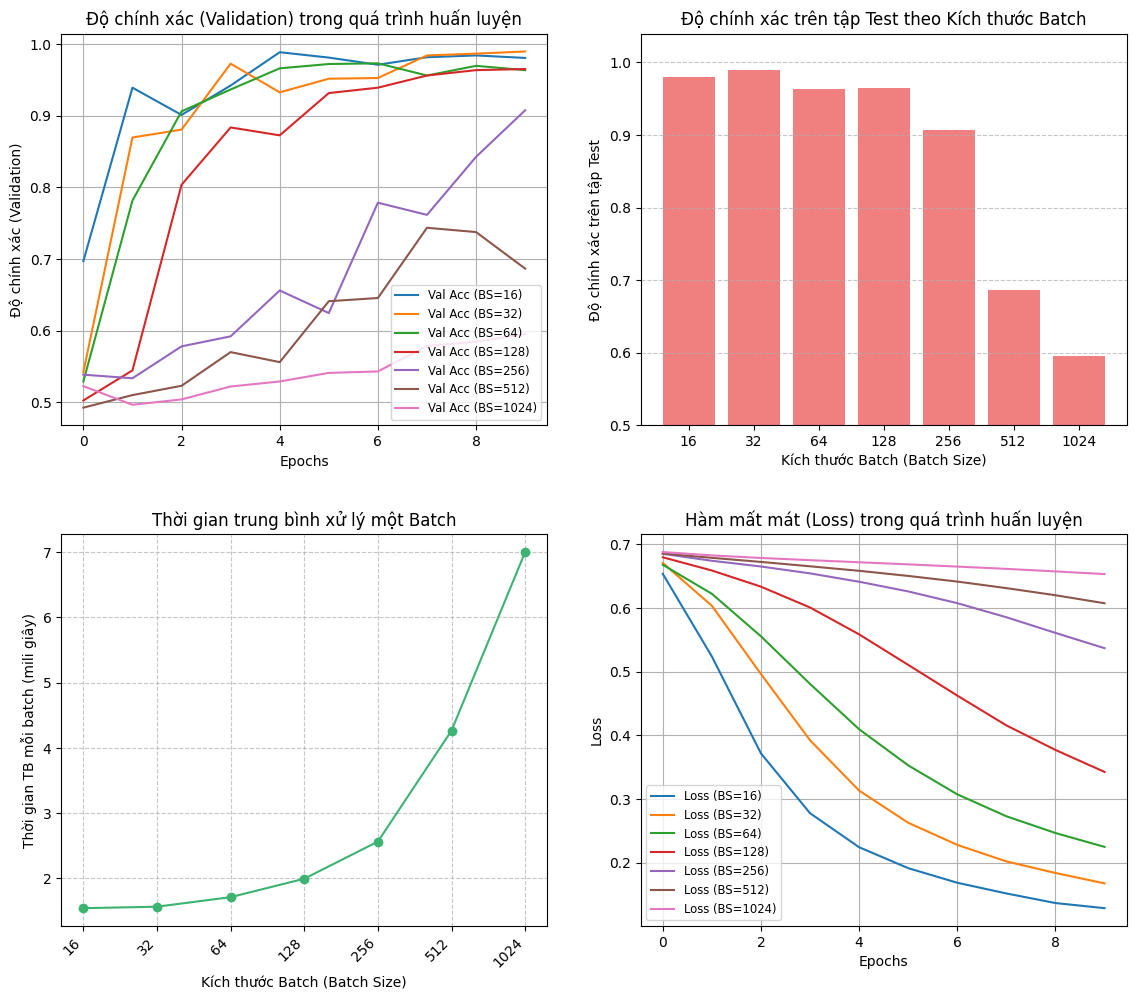


--- Phân tích ảnh hưởng của Batch Size ---
Thời gian chạy code: 2025-05-09 19:31:31

Thời gian trung bình xử lý một Batch:
- Khi batch_size tăng, thời gian để xử lý một batch riêng lẻ thường sẽ tăng lên. Điều này là do mỗi batch chứa nhiều mẫu hơn, đòi hỏi nhiều phép tính hơn trong cả forward và backward pass.
- Tuy nhiên, việc tăng batch_size cũng có thể dẫn đến việc sử dụng tài nguyên phần cứng (đặc biệt là GPU) hiệu quả hơn nhờ vào tính toán song song. Điều này có thể không hoàn toàn bù đắp cho việc xử lý nhiều dữ liệu hơn trong một batch, nhưng nó giải thích tại sao thời gian xử lý một batch không tăng tuyến tính hoàn toàn với kích thước batch.

Thời gian huấn luyện tổng cộng mỗi Epoch/Toàn bộ:
- Batch Size nhỏ (ví dụ: 16, 32):
  + Ưu điểm:
    + Cập nhật trọng số thường xuyên hơn (nhiều batches hơn mỗi epoch), có thể giúp mô hình hội tụ nhanh hơn về mặt số lần cập nhật (iterations) và thoát khỏi các điểm cực tiểu địa phương nông.
    + Thường cho khả năng tổng quát hóa tốt hơn (g

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import time
import matplotlib.pyplot as plt

# --- 0. Kiểm tra thiết bị (CPU/GPU) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng thiết bị: {device}")
# Lấy thời gian hiện tại để tham khảo
current_time_str = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
print(f"Thời gian chạy code: {current_time_str}")


# --- 1. Chuẩn bị dữ liệu ---
# Tạo dữ liệu mẫu (ví dụ: bài toán phân loại nhị phân)
num_samples = 10000
num_features = 20

# Tạo dữ liệu ngẫu nhiên
X_np = np.random.rand(num_samples, num_features).astype(np.float32)
# Tạo nhãn dựa trên một quy tắc đơn giản (ví dụ: tổng các feature > 10)
y_np = (np.sum(X_np, axis=1) > num_features / 2).astype(np.float32).reshape(-1, 1)

# Chia dữ liệu thành tập train và test
split_ratio = 0.8
split_index = int(num_samples * split_ratio)

X_train_np, X_test_np = X_np[:split_index], X_np[split_index:]
y_train_np, y_test_np = y_np[:split_index], y_np[split_index:]

# Chuyển đổi sang PyTorch Tensors
X_train = torch.from_numpy(X_train_np).to(device)
y_train = torch.from_numpy(y_train_np).to(device)
X_test = torch.from_numpy(X_test_np).to(device)
y_test = torch.from_numpy(y_test_np).to(device)

print(f"Kích thước tập huấn luyện: {X_train.shape}, {y_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}, {y_test.shape}")

# --- 2. Định nghĩa mô hình MLP ---
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_units=64):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_dim, hidden_units, bias=True)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_units, 1, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# --- 3. Huấn luyện mô hình với các batch_size khác nhau ---
batch_sizes_to_test = [16, 32, 64, 128, 256, 512, 1024]
epochs = 10
learning_rate = 0.001

training_times = []
final_accuracies = []
avg_time_per_batch_list = [] # Danh sách mới để lưu thời gian trung bình mỗi batch
history_per_batch_size = {}

for batch_size in batch_sizes_to_test:
    print(f"\n--- Đang huấn luyện với batch_size = {batch_size} ---")

    model = MLP(input_dim=num_features, hidden_units=64).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()

    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    epoch_losses = []
    epoch_val_accuracies = []
    total_batches_processed_this_run = 0 # Tổng số batch đã xử lý cho batch_size hiện tại
    individual_batch_times_this_run = [] # Lưu thời gian từng batch nhỏ (nếu muốn chi tiết hơn)

    start_train_time_total = time.time() # Thời gian bắt đầu tổng cộng cho batch_size này

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        batches_in_epoch = 0
        # epoch_start_time = time.time() # Nếu muốn tính thời gian mỗi epoch

        for inputs, labels in train_loader:
            batch_start_time = time.perf_counter() # Thời gian bắt đầu xử lý batch

            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            batch_end_time = time.perf_counter() # Thời gian kết thúc xử lý batch
            individual_batch_times_this_run.append(batch_end_time - batch_start_time)

            running_loss += loss.item() * inputs.size(0)
            total_batches_processed_this_run += 1
            batches_in_epoch +=1

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)
        # epoch_duration = time.time() - epoch_start_time

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            val_outputs = model(X_test)
            predicted = (val_outputs > 0.5).float()
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()
        val_accuracy = correct / total
        epoch_val_accuracies.append(val_accuracy)

        if (epoch + 1) % (epochs // 5 if epochs >= 5 else 1) == 0 or epoch == epochs - 1:
             print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Batches: {batches_in_epoch}")


    end_train_time_total = time.time() # Thời gian kết thúc tổng cộng
    total_training_time_for_bs = end_train_time_total - start_train_time_total
    training_times.append(total_training_time_for_bs)

    # Tính thời gian trung bình xử lý một batch
    if total_batches_processed_this_run > 0:
        avg_time_per_batch = total_training_time_for_bs / total_batches_processed_this_run
        # Hoặc nếu muốn dùng tổng thời gian của các batch nhỏ:
        # avg_time_per_batch = sum(individual_batch_times_this_run) / len(individual_batch_times_this_run)
    else:
        avg_time_per_batch = 0 # Trường hợp không có batch nào (ví dụ epochs=0)
    avg_time_per_batch_list.append(avg_time_per_batch)


    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        test_outputs = model(X_test)
        predicted = (test_outputs > 0.5).float()
        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()
    final_accuracy = correct / total
    final_accuracies.append(final_accuracy)
    history_per_batch_size[batch_size] = {'loss': epoch_losses, 'val_accuracy': epoch_val_accuracies}

    print(f"Thời gian huấn luyện tổng cộng: {total_training_time_for_bs:.2f} giây")
    print(f"Tổng số batches đã xử lý: {total_batches_processed_this_run}")
    print(f"Thời gian trung bình mỗi batch: {avg_time_per_batch*1000:.4f} mili giây") # Chuyển sang mili giây cho dễ đọc
    print(f"Độ chính xác cuối cùng trên tập test: {final_accuracy:.4f}")


# --- 4. Trực quan hóa kết quả ---
# Tăng kích thước tổng thể của figure để chứa thêm subplot
plt.figure(figsize=(12, 15)) # Tăng chiều cao

# # Biểu đồ thời gian huấn luyện tổng cộng
# plt.subplot(3, 2, 1) # Thay đổi thành 3 hàng, 2 cột, vị trí 1
# plt.bar([str(bs) for bs in batch_sizes_to_test], training_times, color='skyblue')
# plt.xlabel("Kích thước Batch (Batch Size)")
# plt.ylabel("Thời gian huấn luyện tổng (giây)")
# plt.title("Thời gian huấn luyện tổng theo Kích thước Batch")
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)


# Biểu đồ độ chính xác cuối cùng
plt.subplot(3, 2, 2) # Vị trí 2
plt.bar([str(bs) for bs in batch_sizes_to_test], final_accuracies, color='lightcoral')
plt.xlabel("Kích thước Batch (Batch Size)")
plt.ylabel("Độ chính xác trên tập Test")
plt.title("Độ chính xác trên tập Test theo Kích thước Batch")
plt.ylim([min(0.5, min(final_accuracies) - 0.05 if final_accuracies else 0.5), max(1.0, max(final_accuracies) + 0.05 if final_accuracies else 1.0)])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


# Biểu đồ thời gian trung bình mỗi batch
plt.subplot(3, 2, 3) # Vị trí 3 (subplot mới)
plt.plot([str(bs) for bs in batch_sizes_to_test], [t * 1000 for t in avg_time_per_batch_list], marker='o', linestyle='-', color='mediumseagreen')
plt.xlabel("Kích thước Batch (Batch Size)")
plt.ylabel("Thời gian TB mỗi batch (mili giây)")
plt.title("Thời gian trung bình xử lý một Batch")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.7)


# Biểu đồ quá trình học (loss) cho các batch_size
plt.subplot(3, 2, 4) # Vị trí 4
for batch_size_val, history_data in history_per_batch_size.items():
    plt.plot(history_data['loss'], label=f'Loss (BS={batch_size_val})')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Hàm mất mát (Loss) trong quá trình huấn luyện")
plt.legend(fontsize='small')
plt.grid(True)

# Biểu đồ quá trình học (accuracy) cho các batch_size
plt.subplot(3, 2, 1) # Vị trí 5
for batch_size_val, history_data in history_per_batch_size.items():
    plt.plot(history_data['val_accuracy'], label=f'Val Acc (BS={batch_size_val})')
plt.xlabel("Epochs")
plt.ylabel("Độ chính xác (Validation)")
plt.title("Độ chính xác (Validation) trong quá trình huấn luyện")
plt.legend(fontsize='small')
plt.grid(True)

plt.tight_layout(pad=3.0) # Điều chỉnh khoảng cách giữa các subplot
plt.show()

# --- 5. Phân tích kết quả (Nhận xét) ---
print("\n--- Phân tích ảnh hưởng của Batch Size ---")
print(f"Thời gian chạy code: {current_time_str}")
print("\nThời gian trung bình xử lý một Batch:")
print("- Khi batch_size tăng, thời gian để xử lý một batch riêng lẻ thường sẽ tăng lên. Điều này là do mỗi batch chứa nhiều mẫu hơn, đòi hỏi nhiều phép tính hơn trong cả forward và backward pass.")
print("- Tuy nhiên, việc tăng batch_size cũng có thể dẫn đến việc sử dụng tài nguyên phần cứng (đặc biệt là GPU) hiệu quả hơn nhờ vào tính toán song song. Điều này có thể không hoàn toàn bù đắp cho việc xử lý nhiều dữ liệu hơn trong một batch, nhưng nó giải thích tại sao thời gian xử lý một batch không tăng tuyến tính hoàn toàn với kích thước batch.")

print("\nThời gian huấn luyện tổng cộng mỗi Epoch/Toàn bộ:")
print("- Batch Size nhỏ (ví dụ: 16, 32):")
print("  + Ưu điểm:")
print("    + Cập nhật trọng số thường xuyên hơn (nhiều batches hơn mỗi epoch), có thể giúp mô hình hội tụ nhanh hơn về mặt số lần cập nhật (iterations) và thoát khỏi các điểm cực tiểu địa phương nông.")
print("    + Thường cho khả năng tổng quát hóa tốt hơn (generalization) trên một số bộ dữ liệu.")
print("  + Nhược điểm:")
print("    + Thời gian huấn luyện mỗi epoch thường lâu hơn do overhead của việc xử lý nhiều batch và nạp dữ liệu cho từng batch nhỏ. Số lượng batch nhiều hơn làm tăng tổng thời gian tính toán, mặc dù mỗi batch riêng lẻ nhanh hơn batch lớn.")
print("    + Ước lượng gradient nhiễu hơn, có thể làm quá trình hội tụ không ổn định.")

print("\n- Batch Size lớn (ví dụ: 128, 256, full-batch):")
print("  + Ưu điểm:")
print("    + Thời gian huấn luyện mỗi epoch thường nhanh hơn do có ít batch hơn để xử lý và tận dụng tốt hơn tính toán song song trên GPU/CPU cho mỗi batch lớn.")
print("    + Ước lượng gradient chính xác hơn và ít nhiễu hơn, giúp quá trình hội tụ ổn định hơn.")
print("  + Nhược điểm:")
print("    + Mặc dù thời gian mỗi epoch có thể nhanh hơn, thời gian xử lý một batch riêng lẻ lại lâu hơn.")
print("    + Cập nhật trọng số ít thường xuyên hơn.")
print("    + Có nguy cơ hội tụ vào các điểm cực tiểu địa phương sắc nét (sharp minima), có thể dẫn đến khả năng tổng quát hóa kém hơn.")
print("    + Yêu cầu nhiều bộ nhớ hơn.")

print("\nLựa chọn Batch Size:")
print("Việc lựa chọn batch_size tối ưu là một sự cân bằng:")
print("- Giữa thời gian xử lý một batch (batch lớn hơn = lâu hơn) và tổng thời gian huấn luyện một epoch (batch lớn hơn thường = nhanh hơn do ít batch hơn và song song hóa tốt hơn).")
print("- Giữa tốc độ hội tụ (số epoch) và chất lượng của điểm hội tụ (khả năng tổng quát hóa).")
print("Cần thử nghiệm với các giá trị khác nhau. Các giá trị phổ biến thường là lũy thừa của 2.")